# Loading and using models from the BioImage Model Zoo

This notebook shows how to interact with the `bioimageio.core` programmatically to explore, load and use content from the [BioImage Model Zoo](https://bioimage.io).

## Dependency installation. ONLY FOR GOOGLE COLAB!

In [ ]:
!pip install bioimageio.core
!pip install pytorch
!pip install matplotlib
!git clone https://github.com/bioimage-io/AI4Life_CommunityEvent_W1S2.git

## 0. Load dependencies

In [3]:
#@markdown ## Load dependencies
### 0.1.Enable pretty_validation_errors
# This function displays validation errors in a human readable format.
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()
### 0.2. Load general dependencies
# Load general dependencies
from pprint import pprint
import bioimageio.core
import bioimageio.spec
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from bioimageio.spec.model import v0_5
from bioimageio.spec.utils import load_array
from bioimageio.core.digest_spec import get_test_inputs
from bioimageio.spec.utils import download
from bioimageio.core import Tensor
from bioimageio.core import Sample
from bioimageio.core import predict
from bioimageio.core import create_prediction_pipeline
from bioimageio.core import test_model
from bioimageio.core import load_description

# Function to display input and prediction output images
def show_images(sample_tensor, prediction_tensor):
    input_array = sample_tensor.members["input0"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    output_array = prediction_tensor.members["output0"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    plt.figure()
    ax1 = plt.subplot(1, 2, 1)
    ax1.set_title("Input")
    ax1.axis("off")
    plt.imshow(input_array)
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_title("Prediction")
    ax2.axis("off")
    plt.imshow(output_array)
    plt.show()
print("Dependencies loaded")
print(f"biomageio.specs version {bioimageio.spec.__version__} is used")
print(f"biomageio.core version {bioimageio.core.__version__} is used")

Dependencies loaded
biomageio.specs version 0.5.4.1 is used
biomageio.core version 0.8.0 is used


## 1. Load a model

### 1.1 Inspect available models in the Bioimage Model Zoo

Go to https://bioimage.io to browser available models

### 1.2 Load model from the BioImage Model Zoo

`bioimage.io` resources may be identified via their bioimage.io __ID__, e.g. "affable-shark" or the [__DOI__](https://doi.org/) of their [__Zenodo__](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1" or a version specific [__Zenodo__](https://zenodo.org/) backup [__DOI__](https://doi.org/)).

Alternatively, any rdf.yaml source, single file or in a .zip, may be loaded by providing its __local path__ or __URL__.

In [4]:
BMZ_MODEL_ID = "affable-shark"  # "affable-shark"
BMZ_MODEL_DOI = ""  # "10.5281/zenodo.6287342"
BMZ_MODEL_URL = "" #"https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/draft/files/rdf.yaml"

`load_description` is a function of the `bioimageio.spec` package, but as it is a sub-package of `bioimageio.core` it can also be called from it by `bioimageio.core.load_description`.

To learn more about the functionalities of the `bioimageio.spec` package, see the [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb), also available as a [Google Colab](https://colab.research.google.com/github/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb) notebook.

In [5]:
# Load the model description
# ------------------------------------------------------------------------------
if BMZ_MODEL_ID != "":
    model = load_description(BMZ_MODEL_ID)
    print(
        f"\nThe model '{model.name}' with ID '{BMZ_MODEL_ID}' has been correctly loaded."
    )
elif BMZ_MODEL_DOI != "":
    model = load_description(BMZ_MODEL_DOI)
    print(
        f"\nThe model '{model.name}' with DOI '{BMZ_MODEL_DOI}' has been correctly loaded."
    )
elif BMZ_MODEL_URL != "":
    model = load_description(BMZ_MODEL_URL)
    print(
        f"\nThe model '{model.name}' with URL '{BMZ_MODEL_URL}' has been correctly loaded."
    )
else:
    print("\nPlease specify a model ID, DOI or URL")

if "draft" in BMZ_MODEL_ID or "draft" in BMZ_MODEL_DOI or "draft" in BMZ_MODEL_URL:
    print(
        f"\nThis is the DRAFT version of '{model.name}'. \nDraft versions have not been reviewed by the Bioimage Model Zoo Team and may contain harmful code. Run with caution."
    )

100%|██████████████████████████████████████████| 845/845 [00:00<00:00, 628kB/s]
100%|█████████████████████████████████████| 1.57k/1.57k [00:00<00:00, 1.83MB/s]
SHA256 hash of downloaded file: 9b8330e6fae8403efc7a44bb7365186c14fb6222b608791baab7a4e0352dbdcd
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████████████| 262k/262k [00:00<00:00, 394MB/s]
100%|█████████████████████████████████████| 65.8k/65.8k [00:00<00:00, 65.1MB/s]
100%|████████████████████████████████████████| 524k/524k [00:00<00:00, 716MB/s]
100%|████████████████████████████████████████| 525k/525k [00:00<00:00, 649MB/s]
100%|████████████████████████████████████████| 116M/116M [00:00<00:00, 116GB/s]
100%|█████████████████████████████████████| 20.9k/20.9k [00:00<00:00, 21.9MB/s]
100%|███████████████████████████████████████| 116M/116M [00:00<00:00, 26.1GB/s]
100%|██████████████████████████████████


The model 'NucleiSegmentationBoundaryModel' with ID 'affable-shark' has been correctly loaded.


In [6]:
pprint(model)

ModelDescr(name='NucleiSegmentationBoundaryModel', description='Nucleus segmentation for fluorescence microscopy', covers=[RelativePath('cover.png')], id_emoji='🦈', authors=[Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')], attachments=[FileDescr(source=RelativePath('zero_mean_unit_variance.ijm'), sha256='767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186')], cite=[CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None), CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None), CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None), CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')], license='CC-BY-4.0', git_repo=None, icon=None, links=['ilastik/stardist_dsb_training_data', 'ilastik/ilastik', 'deepimagej/deepimagej', 'imjoy/BioImageIO-Packager'], uploader=Uploader(email='thefynnbe@gmail.com', name='Fynn Be

## 2. Validation summary and test of the model
Models in the BioImage Model Zoo are validated and tested before publication. The result of these quality checks is accessible through code.


### 2.1 Validation summary
To inspect the corresponding validation summary access the `validation_summary` attribute.

The validation summary will indicate:
- the version of the `bioimageio.spec` library used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

To display the validaiton summary in a terminal or notebook we recommend to run:

In [7]:
model.validation_summary.display()

🟡 
 bioimageio format validation 
 
 
 status 
 valid-format 
 
 
 source 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/rdf.yaml 
 
 
 id 
 10.5281/zenodo.5764892/6647674 
 
 
 format version 
 model 0.5.4 
 
 
 bioimageio.spec 
 0.5.4.1 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` object. 
 
 
 🔍 
 `context:perform_io_checks` 
 True 
 
 
 🔍 
 `context:root` 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files 
 
 
 🔍 
 `context:known_files.zero_mean_unit_variance.ijm` 
 767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186 
 
 
 🔍 
 `context:known_files.test_input_0.npy` 
 c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2 
 
 
 🔍 
 `context:known_files.sample_input_0.tif` 
 a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9 
 
 
 🔍 
 `context:known_files.test_output_0.npy` 
 510181f38930e59e4fd8ecc03d6ea7c980eb6609759655f2d4a41fe36108d5f5 
 
 
 🔍 
 `context:known_files.sample_output_0.tif` 
 e8f99aabe8405427f515eba23a49f58ba50302f57d1fdfd07026e1984f836c5e 
 
 
 🔍 
 `context:known_files.weights.onnx` 
 df913b85947f5132bcdaf81d91af0963f60d44f4caf8a4fec672d96a2f327b44 
 
 
 🔍 
 `context:known_files.unet.py` 
 7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3 
 
 
 🔍 
 `context:known_files.weights.pt` 
 608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7 
 
 
 🔍 
 `context:known_files.weights-torchscript.pt` 
 8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0 
 
 
 ✔️ 
 
 bioimageio.spec format validation model 0.5.4

### 2.2 Test the model
The `bioimageio.core.test_model` function can be used to fully test the model.
This is done by running the predicition on the test input(s) and checking that they agree with the test output(s) provided in the model documentation.

This test should be run before using the model to ensure that it works properly.

----

`bioimageio.core.test_model` returns a validation dictionary with 'status'='passed'/'failed' and other detailed information that can be inspected by calling `.display()` on it.

The validation summary will indicate:
- the versions of the `bioimageio.spec` and `bioimageio.core` libraries used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

In [8]:
## Pytorch model is tested for the purpose of this example, but given the correct python environment setup, other weight formats could be tested (e.g., ONNX or TensorFlow)
test_summary = test_model(model, weight_format='pytorch_state_dict')
test_summary.display()

2025-05-21 10:35:50.579 | DEBUG    | bioimageio.core._resource_tests:_test_model_inference:593 - starting 'Reproduce test outputs from test inputs (pytorch_state_dict)'
2025-05-21 10:35:54.201 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:705 - Testing inference with 6 different inputs (B, N): {(1, 2), (2, 1), (1, 1), (2, 0), (2, 2), (1, 0)}


✔️ 
 bioimageio format validation 
 
 
 status 
 passed 
 
 
 source 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/rdf.yaml 
 
 
 id 
 10.5281/zenodo.5764892/6647674 
 
 
 format version 
 model 0.5.4 
 
 
 bioimageio.core 
 0.8.0 
 
 
 bioimageio.spec 
 0.5.4.1 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` object. 
 
 
 🔍 
 `context:perform_io_checks` 
 True 
 
 
 🔍 
 `context:root` 
 https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files 
 
 
 🔍 
 `context:known_files.zero_mean_unit_variance.ijm` 
 767f2c3a50e36365c30b9e46e57fcf82e606d337e8a48d4a2440dc512813d186 
 
 
 🔍 
 `context:known_files.test_input_0.npy` 
 c29bd6e16e3f7856217b407ba948222b1c2a0da41922a0f79297e25588614fe2 
 
 
 🔍 
 `context:known_files.sample_input_0.tif` 
 a24b3c708b6ca6825494eb7c5a4d221335fb3eef5eb9d03f4108907cdaad2bf9 
 
 
 🔍 
 `context:known_files.test_output_0.npy` 
 510181f38930e59e4fd8ecc03d6ea7c980eb6609759655f2d4a41fe36108d5f5 
 
 
 🔍 
 `context:known_files.sample_output_0.tif` 
 e8f99aabe8405427f515eba23a49f58ba50302f57d1fdfd07026e1984f836c5e 
 
 
 🔍 
 `context:known_files.weights.onnx` 
 df913b85947f5132bcdaf81d91af0963f60d44f4caf8a4fec672d96a2f327b44 
 
 
 🔍 
 `context:known_files.unet.py` 
 7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3 
 
 
 🔍 
 `context:known_files.weights.pt` 
 608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7 
 
 
 🔍 
 `context:known_files.weights-torchscript.pt` 
 8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0 
 
 
 ✔️ 
 
 bioimageio.spec format validation model 0.5.4 
 
 
 ✔️ 
 type 
 Has expected resource type 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Reproduce test outputs from test inputs (pytorch_state_dict) 
 
 
 🐍 
 weights.pytorch_state_dict 
 recommended conda env for:
Reproduce test outputs from test inputs (pytorch_state_dict)
 %YAML 1.2
---
channels:
 - pytorch
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - mkl ==2024.0.0
 - numpy <2
 - pip
 - pytorch==1.10.0
 - setuptools <70.0.0
 - torchaudio==0.10.0
 - torchvision==0.11.0
 
 
 
 🐍 
 weights.pytorch_state_dict 
 conda compare (Reproduce test outputs from test inputs (pytorch_state_dict)):
 compare: 1: conda: not found
 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 2 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 2

## 3 Inspect the model metadata

Let's inspect all the model metadata. For a step-by-step inspection refer to [bioimageio.spec package example notebook](https://github.com/bioimage-io/spec-bioimage-io/blob/main/example/load_model_and_create_your_own.ipynb).

In [9]:
print(f"The model is named '{model.name}'")
print(f"Description:\n{model.description}")
print(f"License: {model.license}")

print("\nThe authors of the model are:")
pprint(model.authors)
print("\nIn addition to the authors it is maintained by:")
pprint(model.maintainers)


print("\nIf you use this model, you are expected to cite:")
pprint(model.cite)

print(f"\nFurther documentation can be found here: {model.documentation}. Note that you may need to download the model directly from the BioImage Model Zoo to access it. ")

if model.git_repo is None:
    print("\nThere is no associated GitHub repository.")
else:
    print(f"\nThere is an associated GitHub repository: {model.git_repo}.")

The model is named 'NucleiSegmentationBoundaryModel'
Description:
Nucleus segmentation for fluorescence microscopy
License: CC-BY-4.0

The authors of the model are:
[Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

In addition to the authors it is maintained by:
[Maintainer(affiliation=None, email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

If you use this model, you are expected to cite:
[CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None),
 CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None),
 CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None),
 CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')]

Further documentation can be found here: documentation.md. Note that you may need to download the model directly from the BioImage Model Zoo to access it. 

There is no associated G


 Covers of the model 'NucleiSegmentationBoundaryModel' are: 


100%|█████████████████████████████████████| 89.1k/89.1k [00:00<00:00, 98.2MB/s]
SHA256 hash of downloaded file: 0dd15c61806fee27e2fe1ef032f758f08fa10baab9627349f2db849cf507df15
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


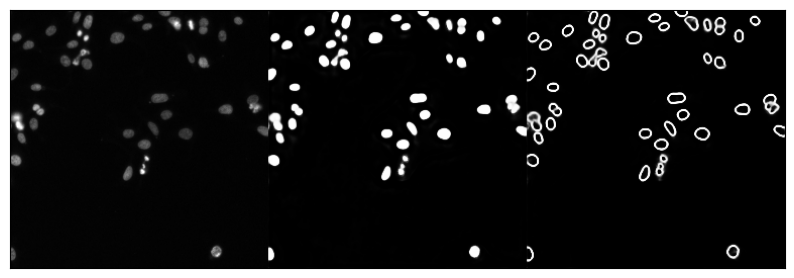

In [10]:
print(f"\n Covers of the model '{model.name}' are: ")
for cover in model.covers:
    cover_data = imread(download(cover).path)
    plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 4. Running a prediction
`bioimageio.core` implements the functionality to run a prediction with models described in the `bioimage.io` format.

### 4.1 Inspect the tecnical requirements of model's input and output

In [11]:
##Inspect the weights and, expected inputs and outputs

print("Available weight formats for this model:", ", ".join(model.weights.model_fields_set))
print("Pytorch state dict weights are stored at:", model.weights.pytorch_state_dict.source.absolute())
print()

# or what inputs the model expects
print(f"The model requires {len(model.inputs)} input(s) with the following features:")
for inp in model.inputs:
    if isinstance(inp.axes, str):
        print(" - Input with axes:", ([i for i in inp.axes]))
    else:
        print(" - Input with axes:", ([i.id for i in inp.axes]))
    print(" - Minimum shape:", ([s.min if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in inp.shape]))
    print(" - Step:", ([s.step if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in inp.shape]))
    print()
    print(f"It is expected to be preprocessed with:")
    if len(inp.preprocessing) == 0: print("No preprocessing is done.")
    for prep in inp.preprocessing:
        if hasattr(prep, 'id'):
            print(f" - '{prep.id}' with arguments:")
            for prerp_arg in prep.kwargs:
                print(f"    - {prerp_arg[0]}={prerp_arg[1]}")
        else:
            print(f" - '{prep.name}' with arguments:")
            for prerp_arg in prep.kwargs:
                print(f"    - {prerp_arg[0]}={prerp_arg[1]}")
print()
# and what the model outputs are
print(f"The model gives {len(model.outputs)} output(s) with the following features:")
for out in model.outputs:
    if isinstance(out.axes, str):
        print(" - Output with axes:", ([o for o in out.axes]))
    else:
        print(" - Output with axes:", ([o.id for o in out.axes]))
    print(" - Minimum shape:", ([s if type(s) is bioimageio.spec.model.v0_5.SizeReference else s for s in out.shape]))
    print(" - Step:", ([s.step if type(s) is bioimageio.spec.model.v0_5.ParameterizedSize else s for s in out.shape]))
    print()
    print(f"It is expected to be postprocessed with:")
    if len(out.postprocessing) == 0: print("No postprocessing is done.")
    for postp in out.postprocessing:
        print(f" - '{postp.id}' with arguments:")
        for postp_arg in postp.kwargs:
           print(f"    - {postp_arg[0]}={postp_arg[1]}")
    #print(f"The output image has a halo of : {out.halo}")

Available weight formats for this model: torchscript, onnx, pytorch_state_dict
Pytorch state dict weights are stored at: https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights.pt

The model requires 1 input(s) with the following features:
 - Input with axes: ['batch', 'channel', 'y', 'x']
 - Minimum shape: [None, 1, 64, 64]
 - Step: [None, 1, 16, 16]

It is expected to be preprocessed with:
 - 'ensure_dtype' with arguments:
    - dtype=float32
 - 'zero_mean_unit_variance' with arguments:
    - axes=['channel', 'y', 'x']
    - eps=1e-06
 - 'ensure_dtype' with arguments:
    - dtype=float32

The model gives 1 output(s) with the following features:
 - Output with axes: ['batch', 'channel', 'y', 'x']
 - Minimum shape: [None, 2, SizeReference(tensor_id='input0', axis_id='y', offset=0), SizeReference(tensor_id='input0', axis_id='x', offset=0)]
 - Step: [None, 2, SizeReference(tensor_id='input0', axis_id='y', offset=0), SizeReference(tensor_id='input0', axis_id='x', offset=

### 4.2. Load the test image
bioimageio.core package can run predictions on numpy.ndarray/xarray.DataArray as input and, given the convenient functions, on images stored on disc.

It is possible to access the test input sample given with the model using arrays or tensors.

The helper function `get_test_inputs` directly imports the test input sample for a given model.

Test input array shape: (1, 1, 256, 256)


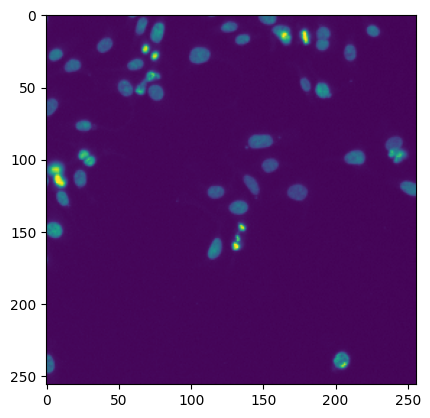

Test input tensor:


Sample(members={'input0': <bioimageio.core.tensor.Tensor object at 0x7ab7c2eaa750>}, stat={}, id='test-sample')

In [12]:
## Load input test image as an array
input_image = load_array(model.inputs[0].test_tensor)
print(f"Test input array shape: {input_image.shape}")
## Plot input test image
plt.imshow(np.squeeze(input_image))
plt.show()

## Load input test image as a tensor
test_sample = get_test_inputs(model)
print("Test input tensor:")
test_sample


### 4.3. Create a prediciton pipeline

The `prediction_pipeline` function runs a prediction with a given model.
- It applies the __pre-processing__, if indicated in the model rdf.yaml, runs __inference__ with the model and applies the __post-processing__, again if specified in the model rdf.yaml.
- The `devices` argument can be used to specify which device(s), CPU, a single GPU, or multiple GPUs (not implemented yet), to use for inference with the model.
- The default is `devices=None`, this will use a __GPU__ if available, otherwise it uses the __CPU__.
- The `weight_format` argument can be used to specify which of the model's available weight formats to use.
- The deafult is `weight_format=None`, this will use the weight format with highest priority (as defined by bioimageio.core).
- It expects and returns a `Sample` object (i.e., sample of Tensors as input).

Here we use the prediction pipeline to process the previously loaded test image.


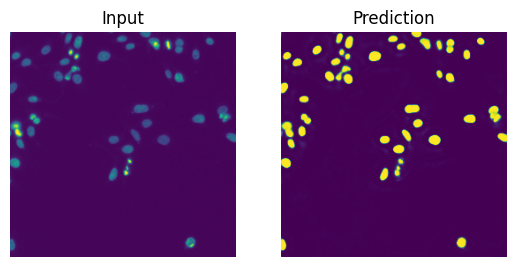

In [13]:
devices = None
weight_format = None

prediction_pipeline = create_prediction_pipeline(
    model, devices=devices, weight_format=weight_format
)
prediction: Sample = prediction_pipeline.predict_sample_without_blocking(test_sample)

# show the prediction result
show_images(test_sample, prediction)

### 4.4. Prediction without a PredicitionPipeline

`bioimageio.core` has two convenience functions `predict` and `predict_many` which allow the prediction of images without creating a `PredictionPipeline`.

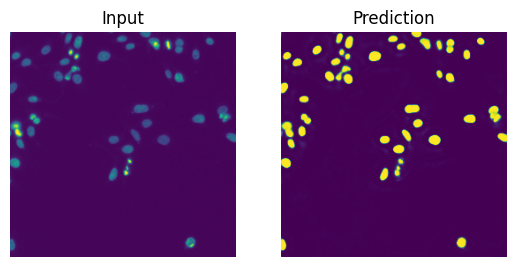

In [14]:
prediction: Sample = predict(model=model, inputs=test_sample)
# show the prediction result
show_images(test_sample, prediction)

### 4.5. Recover input and output tensors as numpy arrays

This example code shows how to recover the image information from the input and output tensors as numpy arrays.

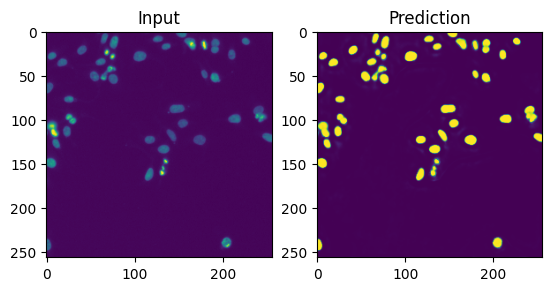

In [15]:
np_input_list = []
np_output_list = []

# iterate over the number of tensors inside the input sample
for ipt in range(len(test_sample.members.keys())):
    input_array = test_sample.members[f"input{ipt}"].data

    # Check for the number of channels to enable display
    input_array = np.squeeze(input_array)
    if len(input_array.shape) > 2:
        input_array = input_array[0]

    np_input_list.append(input_array)

# iterate over the number of tensors inside the output prediction
for out in range(len(prediction.members.keys())):
    output_array = prediction.members[f"output{ipt}"].data

    # Check for the number of channels to enable display
    output_array = np.squeeze(output_array)
    if len(output_array.shape) > 2:
        output_array = output_array[0]

    np_output_list.append(output_array)
## Plot
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np_input_list[0])
plt.title("Input")
plt.subplot(1,2,2)
plt.imshow(np_output_list[0])
plt.title("Prediction")
plt.show()

### 4.6 Running predictions on locally stored new images

Note that you may need to change the `path_image` depending on whether this is running locally or on Google Colab. Generally it may look like one of the followings:
- Google colab: `path_image = "/content/AI4Life_CommunityEvent_W1S2/example-images/image3.png"`
- Locally: `path_image = "example-images/image1.png"`

Input image shape: (256, 256)
tensor shape: Frozen({'batch': 1, 'channel': 1, 'y': 256, 'x': 256})


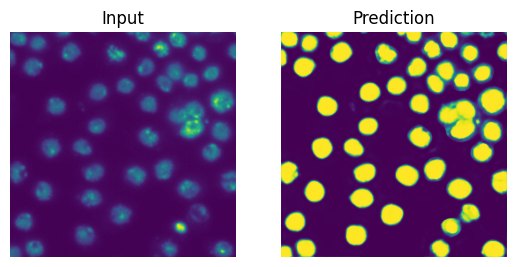

In [19]:
## Read input image as an array
path_image = "/content/AI4Life_CommunityEvent_W1S2/example-images/image3.png" #"example-images/image1.png"
input_image = imread(path_image)
print(f"Input image shape: {input_image.shape}")
## Create a tensor from image array
test_input_tensor = Tensor.from_numpy(input_image, dims=model.inputs[0].axes)
# print the axis annotations ('dims') and the shape of the input array
print(f"tensor shape: {test_input_tensor.tagged_shape}")

## Create a sample of tensors to run predictions
sample = Sample(members={"input0": test_input_tensor}, stat={}, id="sample-from-numpy")

# Run the prediction and display it
prediction: Sample = predict(model=model, inputs=sample)
show_images(sample, prediction)